## ¿Ha sido resistiré la canción más escuchada en el confinamiento en España?


## Preparación

In [46]:
# Help: https://github.com/kelvingakuo/fycharts#in
#! pip install fycharts

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
from datetime import date

#Fechas selección
fecha_fin = '2020-04-21' 
fecha_inicial = '2020-03-14' #14 Marzo se decreta el estado de alarma, con 5753 casos y 136 fallecidos
fecha_fin2 = datetime.strptime(fecha_fin, '%Y-%m-%d')
fecha_inicial2 = datetime.strptime(fecha_inicial, '%Y-%m-%d')
print('Días totales seleccionados:', fecha_fin2 - fecha_inicial2)


Días totales seleccionados: 38 days, 0:00:00


In [3]:
'''
# Para traer los datos iniciales de ESPAÑA
from fycharts.SpotifyCharts import SpotifyCharts
import sqlalchemy

api = SpotifyCharts()
connector = sqlalchemy.create_engine("sqlite:///spotifycharts.db", echo=False)
api.top200Daily(output_file = "top_200_daily.csv", output_db = connector, webhook = "https://mywebhookssite.com/post/", 
                start = fecha_inicial, end = fecha_fin, region = ["es"])
'''

INFO : 21/04/2020 06:57:13 PM : Extracting top 200 daily for 2020-03-14 - es
INFO : 21/04/2020 06:57:15 PM : Extracting top 200 daily for 2020-03-15 - es
INFO : 21/04/2020 06:57:15 PM : Appending data to the table top_200_daily
INFO : 21/04/2020 06:57:15 PM : POSTing data to the endpoint h
INFO : 21/04/2020 06:57:15 PM : Appending data to the file top_200_daily.csv...
INFO : 21/04/2020 06:57:15 PM : Done appending to the table top_200_daily!!!
INFO : 21/04/2020 06:57:15 PM : Done appending to the file top_200_daily.csv!!!
Exception in thread Thread-6:
Traceback (most recent call last):
  File "/Users/victormac/PROYECTOS/REPOS/REPOS-Github/spotify-resistire-covid19/fycharts/SpotifyCharts.py", line 87, in __post_to_endpoint_from_queue
    postToRestEndpoint(df, url, what_data)
  File "/Users/victormac/PROYECTOS/REPOS/REPOS-Github/spotify-resistire-covid19/fycharts/write_to_outputs.py", line 54, in postToRestEndpoint
    raise(e)
  File "/Users/victormac/PROYECTOS/REPOS/REPOS-Github/spoti

KeyboardInterrupt: 

## Importar la tabla

In [47]:
# Importamos la tabla 
data_spain = pd.read_csv("top_200_daily.csv", parse_dates= ["date"], usecols=['Position', 'date', 'Track Name', 'Artist', 'Streams'])
data_spain.set_index("date", inplace = True)
# data_spain = data_spain.loc['2020-03-21':'2020-04-14'] #Para coger un rango concreto

# Número de veces que sale la canción Resistiré de Duo dinámico en el top200
print(data_spain[data_spain ['Artist'] == 'Duo Dinamico'].shape)

# Número de veces que sale la canción Resistiré de 2020 en el top200
print(data_spain[data_spain ['Artist'] == 'Resistiré 2020'].shape)

# Hacemos algunas canciones a examinar
data_duo = data_spain [data_spain ['Artist'] == 'Duo Dinamico']
data_tusa = data_spain [data_spain ['Track Name'] == 'Tusa']
data_shakira = data_spain [data_spain ['Track Name'] == 'Me Gusta']
data_aitana = data_spain [data_spain ['Track Name'] == '+']
data_panas = data_spain [data_spain ['Track Name'] == 'Como Panas']
data_resistire2020 = data_spain [data_spain ['Artist'] == 'Resistiré 2020']

(29, 4)
(18, 4)


## Sacar los datos de SpotifyChart

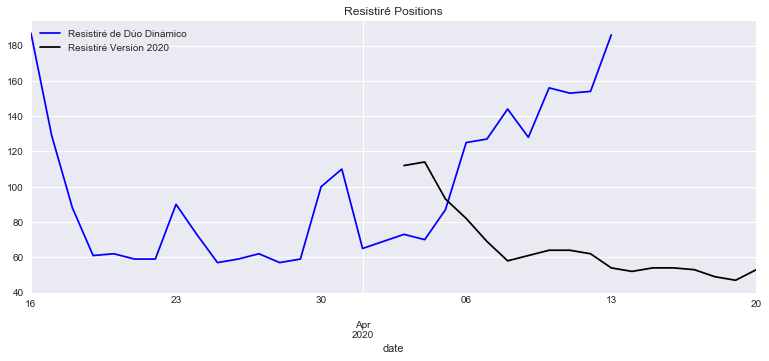

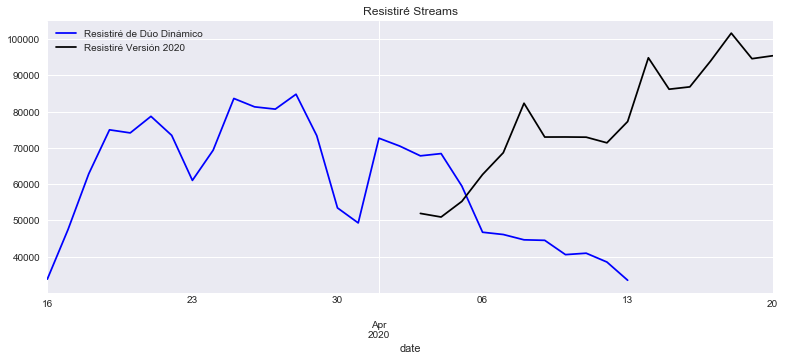

In [49]:
#Vamos a plotear como cambiar de posición la canción
plt.style.use("seaborn")
plt.subplots(figsize = (13,5))
data_duo.Position.plot(label = 'Resistiré de Dúo Dinámico', title='Resistiré Positions', color= 'b')
data_resistire2020.Position.plot(label = "Resistiré Versión 2020", color= 'k')
plt.legend()
plt.show()

#Vamos a plotear el número de streams
plt.subplots(figsize = (13,5))
data_duo.Streams.plot(label = 'Resistiré de Dúo Dinámico', title='Resistiré Streams', color= 'b')
data_resistire2020.Streams.plot(label = 'Resistiré Versión 2020', color= 'k')
plt.legend()
plt.show()


#Preparar tablar para Datawrapper
data_duo_export_position = data_duo['Position'].copy()
data_resistire2020_export_position = data_resistire2020['Position'].copy()
data_duo_concat_positions = pd.concat([data_duo_export_position, data_resistire2020_export_position], axis=1,)
data_duo_concat_positions.columns = ['Resistiré de Dúo Dinámico', 'Resistiré Versión 2020']

data_duo_export_streams = data_duo['Streams'].copy()
data_resistire2020_export_streams = data_resistire2020['Streams'].copy()
data_duo_concat_streams = pd.concat([data_duo_export_streams, data_resistire2020_export_streams], axis=1,)
data_duo_concat_streams.columns = ['Resistiré de Dúo Dinámico', 'Resistiré Versión 2020']


# Exportar CSV
data_duo_concat_positions.to_csv('data_spotify_duo_positions.csv', sep = ';')
data_duo_concat_streams.to_csv('data_spotify_duo_streams.csv', sep = ';')

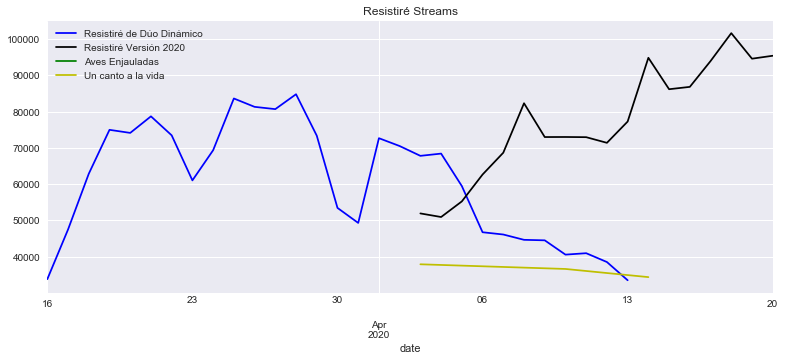

In [50]:
#Vamos a plotear las cancaiones de resistiré y otras posibles similares

data_aves = data_spain [data_spain ['Track Name'] == 'Aves Enjauladas']
data_bisbal = data_spain [data_spain ['Track Name'] == 'Si tú la quieres'] #No sale en el top
data_codo = data_spain [data_spain ['Track Name'] == 'Codo con codo'] #no sale en el top
data_canto = data_spain [data_spain ['Track Name'] == 'Un canto a la vida']

plt.style.use("seaborn")
plt.subplots(figsize = (13,5))
data_duo.Streams.plot(label = 'Resistiré de Dúo Dinámico', title='Resistiré Streams', color= 'b')
data_resistire2020.Streams.plot(label = "Resistiré Versión 2020", color= 'k')
data_aves.Streams.plot(label = 'Aves Enjauladas', color= 'g')
data_canto.Streams.plot(label = 'Un canto a la vida', color= 'y')
plt.legend()
plt.show()

#Preparar tablar para Datawrapper
data_duo_export_streams = data_duo['Streams'].copy()
data_resistire2020_export_streams = data_resistire2020['Streams'].copy()
data_aves_export_streams = data_aves['Streams'].copy()
data_canto_export_streams = data_canto['Streams'].copy()
data_variasesp_concat_streams = pd.concat([data_duo_export_streams, data_resistire2020_export_streams, data_aves_export_streams, data_canto_export_streams], axis=1,)
data_variasesp_concat_streams.columns = ['Resistiré, de Dúo Dinámico', 'Resistiré Versión 2020', 'Aves Enjauladas, de Rozalén', 'Un canto a la vida, de Vanesa M. y David S.']

# Exportar CSV
data_variasesp_concat_streams.to_csv('data_spotify_variasesp_streams.csv', sep = ';')


In [51]:
# Para encontrar determindas palabras en lista
def check(word, list):
    if word in list:
        print("The word is in the list!")
    else:
        print("The word is not in the list!")

artist_list = pd.unique(data_spain['Artist']).tolist()
track_list = pd.unique(data_spain['Track Name']).tolist()
check('Un canto a la vida', track_list)

The word is in the list!


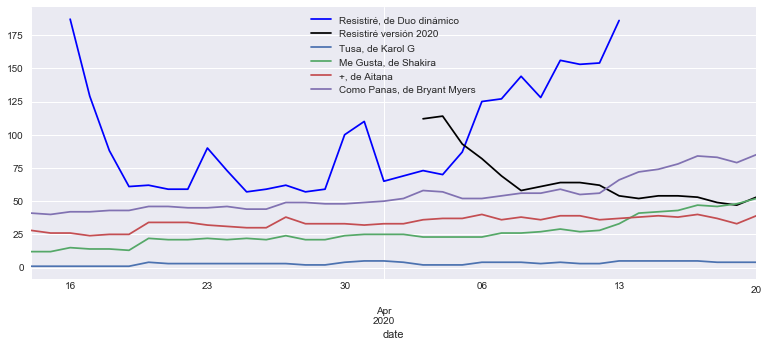

In [52]:
#Vamos a plotear la posición de varias elegidas
plt.subplots(figsize = (13,5))

data_duo.Position.plot(label = "Resistiré, de Duo dinámico", color= 'b')
data_resistire2020.Position.plot(label = "Resistiré versión 2020", color= 'k')
data_tusa.Position.plot(label = "Tusa, de Karol G")
data_shakira.Position.plot(label = "Me Gusta, de Shakira")
data_aitana.Position.plot(label = "+, de Aitana")
data_panas.Position.plot(label = "Como Panas, de Bryant Myers")
plt.legend()
plt.show()


#Preparar tablar para Datawrapper
data_tusa_export_position = data_tusa['Position'].copy()
data_shakira_export_position = data_shakira['Position'].copy()
data_aitana_export_position = data_aitana['Position'].copy()
data_panas_export_position = data_panas['Position'].copy()

data_concat_varios = pd.concat([data_duo_export_position,
                                data_resistire2020_export_position,
                                data_tusa_export_position,
                                data_shakira_export_position,
                                data_aitana_export_position,
                                data_panas_export_position], axis=1)
data_concat_varios.columns = ['Resistiré, de Dúo Dinámico', 
                              'Resistiré, Versión 2020', 
                              "Tusa, de Karol G", 
                              "Me Gusta, de Shakira",
                              "+, de Aitana",
                              "Como Panas, de Bryant Myers"]

# Exportar CSV
data_concat_varios.to_csv('data_spotify_varios_positions.csv', sep = ';')

Como curiosidad, en la canción Resistiré vemos dos grandes bajones de puestos y de escuchas en el periodo y que coinciden curiosamente con los lunes de cada semana, ¿qué está pasando ahí?, ¿será que empezamos la semana con menos ganas de escuchar Resistiré?,¿es el día libre para no escuchar el Resistiré? Si vemos en el gráfico esto no afecta a otras canciones, sólo ocurre con esta canción a primera vista, pero si vemos la canción de Resistiré 2020, ocurre exactamente lo contrario, los lunes se disparan sus reproducciones.

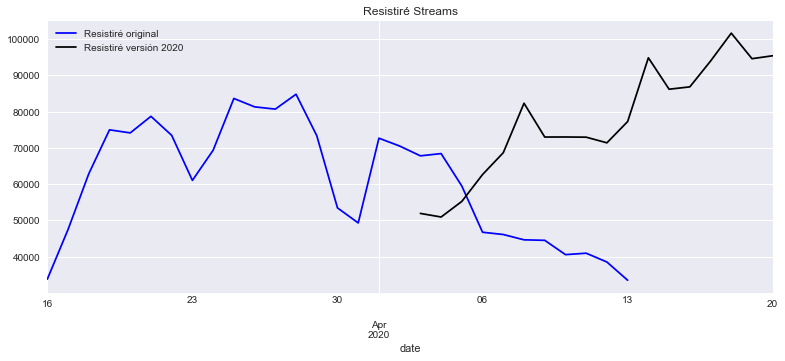

In [53]:
plt.subplots(figsize = (13,5))
data_duo.Streams.plot(label = "Resistiré original", title='Resistiré Streams', color= 'b')
data_resistire2020.Streams.plot(label = "Resistiré versión 2020", color= 'k')
plt.legend()
#plt.show()

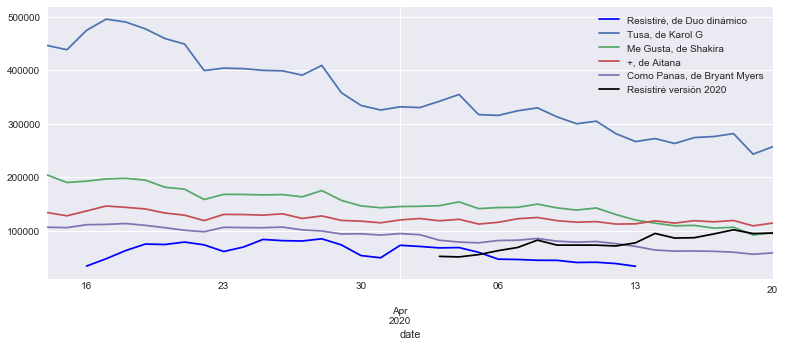

In [54]:
#Vamos a plotear los streams de varias elegidas
plt.subplots(figsize = (13,5))
data_duo.Streams.plot(label = "Resistiré, de Duo dinámico", color= 'b')
data_tusa.Streams.plot(label = "Tusa, de Karol G")
data_shakira.Streams.plot(label = "Me Gusta, de Shakira")
data_aitana.Streams.plot(label = "+, de Aitana")
data_panas.Streams.plot(label = "Como Panas, de Bryant Myers")
data_resistire2020.Streams.plot(label = "Resistiré versión 2020", color= 'k')
plt.legend()
plt.show()


#Preparar tablar para Datawrapper
data_tusa_export_streams = data_tusa['Streams'].copy()
data_shakira_export_streams = data_shakira['Streams'].copy()
data_aitana_export_streams = data_aitana['Streams'].copy()
data_panas_export_streams = data_panas['Streams'].copy()

data_concat_varios_streams = pd.concat([data_duo_export_streams,
                                data_resistire2020_export_streams,
                                data_tusa_export_streams,
                                data_shakira_export_streams,
                                data_aitana_export_streams,
                                data_panas_export_streams], axis=1)
data_concat_varios_streams.columns = ['Resistiré, de Dúo Dinámico', 
                              'Resistiré, Versión 2020', 
                              "Tusa, de Karol G", 
                              "Me Gusta, de Shakira",
                              "+, de Aitana",
                              "Como Panas, de Bryant Myers"]

# Exportar CSV
data_concat_varios_streams.to_csv('data_spotify_varios_streams.csv', sep = ';')

## Por resolver...

In [57]:
data_spain.Position['2020-03-15']

date
2020-03-15      1
2020-03-15      2
2020-03-15      3
2020-03-15      4
2020-03-15      5
             ... 
2020-03-15    196
2020-03-15    197
2020-03-15    198
2020-03-15    199
2020-03-15    200
Name: Position, Length: 200, dtype: int64

In [64]:
# Para ver cuantas canciones suben de puesto desde una fecha inicial a una fecha final 
count_general = 0
count_stop = 0
count_up = 0
count_down = 0
count_out = 0
count_else =  0
dataframe = pd.DataFrame()

for i in data_spain['Track Name']:
    count_general = count_general + 1
    if count_stop == 10000:
        break
    else:
        data = data_spain [data_spain ['Track Name'] == i]
        try:
            if (data.Position['2020-03-15'] - data.Position['2020-04-10'] > 50) == True:            
                # data.Position.plot(label = i, title=i, color= 'b')
                # plt.show()
                # print('Sube!:', i)
                dataframe = pd.concat([dataframe, data], axis=0,)
                count_up = count_up + 1
            elif (data.Position['2020-03-15'] - data.Position['2020-04-10'] <= 50) == True:
                count_down = count_down + 1
                # data.Position.plot(label = i, title=i, color= 'b')
                # plt.show()
                # print('Sube!:', i)
                
            else:
                # print('No sube en puestos:', i)
                count_else = count_else  + 1
                continue       
        except KeyError:
            count_out = count_out + 1
            # print('Una que sale de la lista:', i)
            continue       
    count_stop = count_stop + 1

print('Canciones que se analizan:', count_general)
print('Canciones que se suben de puesto:', count_up)
print('Canciones que bajan de puesto:', count_down)
print('Caque ni suben ni bajan puestos:', count_else)
print('Canciones que salen de la lista:', count_out)
print('¿Coinciden total con analizadas?:', count_general == count_up + count_down + count_out)

Canciones que se analizan: 7600
Canciones que se suben de puesto: 226
Canciones que bajan de puesto: 5279
Caque ni suben ni bajan puestos: 0
Canciones que salen de la lista: 2095
¿Coinciden total con analizadas?: True


In [61]:
# Para ver cuántos valores únicos hay
print(dataframe['Track Name'].nunique())

# Mostrar qué valores únicos hay 
pd.unique(dataframe['Track Name']).tolist()

6


['Mil Tequilas',
 'Atrévete',
 'Physical',
 'PORFA',
 'Roses - Imanbek Remix',
 'death bed (coffee for your head) (feat. beabadoobee)']

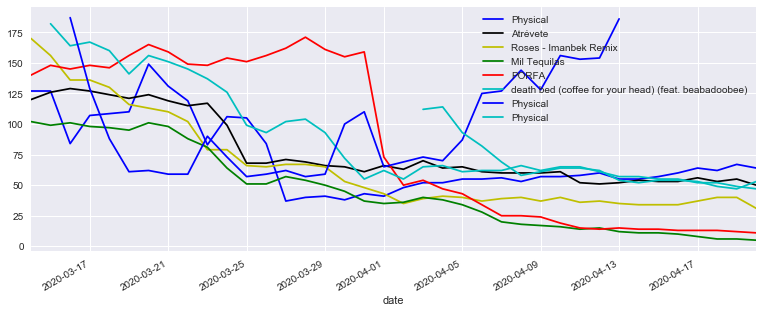

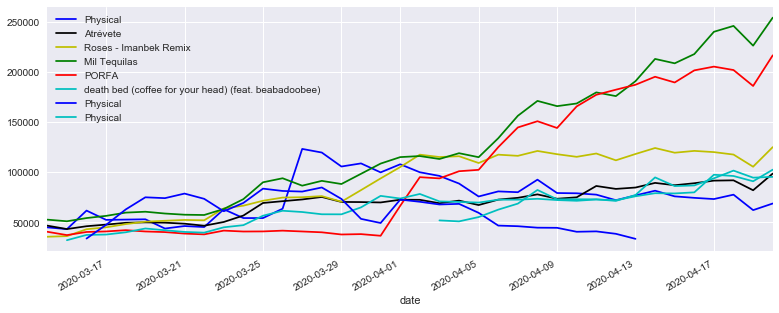

In [22]:
# Vamos a plotearlo
plt.subplots(figsize = (13,5))
data_spain[data_spain['Track Name'] =='Physical'].Position.plot(label = "Physical", color= 'b')
data_spain[data_spain['Track Name'] =='Atrévete'].Position.plot(label = "Atrévete", color= 'k')
data_spain[data_spain['Track Name'] =='Roses - Imanbek Remix'].Position.plot(label = "Roses - Imanbek Remix", color= 'y')
data_spain[data_spain['Track Name'] =='Mil Tequilas'].Position.plot(label = 'Mil Tequilas', color= 'g')
data_spain[data_spain['Track Name'] =='PORFA'].Position.plot(label = "PORFA", color= 'r')
data_spain[data_spain['Track Name'] =='death bed (coffee for your head) (feat. beabadoobee)'].Position.plot(label = "death bed (coffee for your head) (feat. beabadoobee)", color= 'c')
data_spain[data_spain['Artist'] =='Duo Dinamico'].Position.plot(label = "Physical", color= 'b')
data_spain[data_spain['Artist'] =='Resistiré 2020'].Position.plot(label = "Physical", color= 'c')
plt.legend()
plt.show()

# Vamos a plotearlo
plt.subplots(figsize = (13,5))
data_spain[data_spain['Track Name'] =='Physical'].Streams.plot(label = "Physical", color= 'b')
data_spain[data_spain['Track Name'] =='Atrévete'].Streams.plot(label = "Atrévete", color= 'k')
data_spain[data_spain['Track Name'] =='Roses - Imanbek Remix'].Streams.plot(label = "Roses - Imanbek Remix", color= 'y')
data_spain[data_spain['Track Name'] =='Mil Tequilas'].Streams.plot(label = 'Mil Tequilas', color= 'g')
data_spain[data_spain['Track Name'] =='PORFA'].Streams.plot(label = "PORFA", color= 'r')
data_spain[data_spain['Track Name'] =='death bed (coffee for your head) (feat. beabadoobee)'].Streams.plot(label = "death bed (coffee for your head) (feat. beabadoobee)", color= 'c')
data_spain[data_spain['Artist'] =='Duo Dinamico'].Streams.plot(label = "Physical", color= 'b')
data_spain[data_spain['Artist'] =='Resistiré 2020'].Streams.plot(label = "Physical", color= 'c')
plt.legend()
plt.show()



#Preparar tablar para Datawrapper POSITION
data_physical = data_spain [data_spain ['Track Name'] == 'Physical']
data_atrevete = data_spain [data_spain ['Track Name'] == 'Atrévete']
data_roses = data_spain [data_spain ['Track Name'] == 'Roses - Imanbek Remix']
data_mil = data_spain [data_spain ['Track Name'] == 'Mil Tequilas']
data_porfa = data_spain [data_spain ['Track Name'] == 'PORFA']
data_death = data_spain [data_spain ['Track Name'] == 'death bed (coffee for your head) (feat. beabadoobee)']


data_duo_export_streams = data_duo['Streams'].copy()
data_resistire2020_export_streams = data_resistire2020['Streams'].copy()
data_physical_export_streams = data_physical['Streams'].copy()
data_atrevete_export_streams = data_atrevete['Streams'].copy()
data_roses_export_streams = data_roses['Streams'].copy()
data_mil_export_streams = data_mil['Streams'].copy()
data_porfa_export_streams = data_porfa['Streams'].copy()
data_death_export_streams = data_death['Streams'].copy()

data_concat_up_streams = pd.concat([data_physical_export_streams,
                                data_atrevete_export_streams,
                                data_roses_export_streams,
                                data_mil_export_streams,
                                data_porfa_export_streams,
                                data_death_export_streams], axis=1)
data_concat_up_streams.columns = ['Physical, de Dua Lipa', 
                              'Atrévete, de Yago Roche', 
                              "Roses - Imanbek Remix, de SAINt JHN", 
                              "Mil tequilas, de Chema Rivas",
                              "PORFA, de Feid",
                              "Death bed (coffee for your head), Powfu"]

# Preparar tablar para Datawrapper STREAMS
data_duo_export_position = data_duo['Position'].copy()
data_resistire2020_export_position = data_resistire2020['Position'].copy()
data_physical_export_position = data_physical['Position'].copy()
data_atrevete_export_position = data_atrevete['Position'].copy()
data_roses_export_position = data_roses['Position'].copy()
data_mil_export_position = data_mil['Position'].copy()
data_porfa_export_position = data_porfa['Position'].copy()
data_death_export_position = data_death['Position'].copy()

data_concat_up_position = pd.concat([data_physical_export_position,
                                data_atrevete_export_position,
                                data_roses_export_position,
                                data_mil_export_position,
                                data_porfa_export_position,
                                data_death_export_position,
                                data_duo_export_position,
                                data_resistire2020_export_position], axis=1)
data_concat_up_position.columns = ['Physical, de Dua Lipa', 
                              'Atrévete, de Yago Roche', 
                              "Roses - Imanbek Remix, de SAINt JHN", 
                              "Mil tequilas, de Chema Rivas",
                              "PORFA, de Feid",
                              "Death bed (coffee for your head), Powfu",
                              'Resistiré, de Dúo Dinámico', 
                              'Resistiré, Versión 2020']



# Exportar CSV
data_concat_up_streams.to_csv('data_spotify_up_streams.csv', sep = ';')
data_concat_up_position.to_csv('data_spotify_up_position.csv', sep = ';')

## ¿Y en Francia?

Por otro lado hice una prueba para ver si en Francia ocurría lo mismo con su canción de la cuarentena que es considerada La Trendesse, pero en ningún momento llega a su top200.

In [28]:
# Probando con Francia y La Trendresse
from fycharts.SpotifyCharts import SpotifyCharts
import sqlalchemy

api = SpotifyCharts()
connector = sqlalchemy.create_engine("sqlite:///spotifycharts.db", echo=False)
api.top200Daily(output_file = "top_200_daily_france.csv", output_db = connector, webhook = "https://mywebhookssite.com/post/", start = '2020-03-01', end = '2020-04-18', region = ["fr"])

INFO : 18/04/2020 09:59:34 AM : Extracting top 200 daily for 2020-03-01 - fr
INFO : 18/04/2020 09:59:35 AM : Extracting top 200 daily for 2020-03-02 - fr
INFO : 18/04/2020 09:59:35 AM : POSTing data to the endpoint h
INFO : 18/04/2020 09:59:35 AM : Appending data to the table top_200_daily
Exception in thread Thread-13:
Traceback (most recent call last):
  File "/Users/victormac/PROYECTOS/REPOS/REPOS-Github/spotify-resistire/fycharts/SpotifyCharts.py", line 87, in __post_to_endpoint_from_queue
    postToRestEndpoint(df, url, what_data)
  File "/Users/victormac/PROYECTOS/REPOS/REPOS-Github/spotify-resistire/fycharts/write_to_outputs.py", line 54, in postToRestEndpoint
    raise(e)
  File "/Users/victormac/PROYECTOS/REPOS/REPOS-Github/spotify-resistire/fycharts/write_to_outputs.py", line 51, in postToRestEndpoint
    requests.post(url, json = dump)
  File "/Users/victormac/anaconda3/lib/python3.7/site-packages/requests/api.py", line 119, in post
    return request('post', url, data=data,

KeyboardInterrupt: 

In [30]:
data_france = pd.read_csv("top_200_daily_france.csv", parse_dates= ["date"], usecols=['Position', 'date', 'Track Name', 'Artist', 'Streams'])
data_france.set_index("date", inplace = True)
# data_spain = data_spain.loc['2020-03-21':'2020-04-14'] PAra conger un rango concreto
data_france.head(15)
print(data_france[data_france ['Track Name'] == 'La tendresse'].shape)
data_france['Track Name'].str.count('Blinding Lights').sum()

,Position,Track Name,Artist,Streams
date,,,,
2020-03-01,1,6.3,Naps,366476
2020-03-01,2,Blinding Lights,The Weeknd,244585
2020-03-01,3,Meleğim,Soolking,234283
2020-03-01,4,Ne reviens pas,Gradur,225542
2020-03-01,5,M.I.L.S 3,Ninho,219512
2020-03-01,6,Dans l'espace (feat. Heuss l'Enfoiré),Gambi,204525
2020-03-01,7,Moulaga,Heuss L'enfoiré,191573
2020-03-01,8,The Box,Roddy Ricch,191491
2020-03-01,9,MD (feat. Niska),4Keus,189704


In [38]:
# Ayuda: https://www.pythoncircle.com/post/668/uploading-a-file-to-ftp-server-using-python/
import csv
from ftplib import FTP
from io import StringIO

passw = pd.read_csv("pass.txt", sep = ',', encoding="utf-8")
host = "akakicreations.com"
username = passw.columns[0]
password = passw.columns[1]
ftp = FTP(host=host)
login_status = ftp.login(user=username, passwd=password)
print(login_status)



print(ftp.dir())

fp = open("data_spotify_duo_positions.csv", 'rb')
ftp.storbinary('STOR %s' % os.path.basename("data_spotify_duo_positions.csv"), fp, 1024)

fp = open("data_spotify_duo_streams.csv", 'rb')
ftp.storbinary('STOR %s' % os.path.basename("data_spotify_duo_streams.csv"), fp, 1024)

fp = open("data_spotify_varios_positions.csv", 'rb')
ftp.storbinary('STOR %s' % os.path.basename("data_spotify_varios_positions.csv"), fp, 1024)

fp = open("data_spotify_varios_streams.csv", 'rb')
ftp.storbinary('STOR %s' % os.path.basename("data_spotify_varios_streams.csv"), fp, 1024)

fp = open("data_spotify_variasesp_streams.csv", 'rb')
ftp.storbinary('STOR %s' % os.path.basename("data_spotify_variasesp_streams.csv"), fp, 1024)

fp = open("data_spotify_up_streams.csv", 'rb')
ftp.storbinary('STOR %s' % os.path.basename("data_spotify_up_streams.csv"), fp, 1024)

fp = open("data_spotify_up_position.csv", 'rb')
ftp.storbinary('STOR %s' % os.path.basename("data_spotify_up_position.csv"), fp, 1024)



fp.close()




230-OK. Current restricted directory is /
230 399 Kbytes used (0%) - authorized: 51200 Kb
drwxr-xr-x    2 akakicre   akakicre         4096 Apr 22 08:45 .
drwxr-xr-x    2 akakicre   akakicre         4096 Apr 22 08:45 ..
-rw-------    1 akakicre   akakicre           10 Apr 22 08:51 .ftpquota
-rw-r--r--    1 akakicre   akakicre       260069 Apr  3 13:34 Imagen_github.jpg
-rw-r--r--    1 akakicre   akakicre          514 Apr 21 14:31 data_ccaa_confirmed_recovered_deaths.csv
-rw-r--r--    1 akakicre   akakicre         5078 Apr 21 14:31 data_ccaa_evolution_confirmed.csv
-rw-r--r--    1 akakicre   akakicre         3603 Apr 21 14:31 data_ccaa_evolution_deaths.csv
-rw-r--r--    1 akakicre   akakicre         3064 Apr 21 14:31 data_ccaa_evolution_recovered.csv
-rw-r--r--    1 akakicre   akakicre          548 Apr 21 14:31 data_ccaa_newcases_confirmed_recovered_deaths.csv
-rw-r--r--    1 akakicre   akakicre         1152 Apr 21 14:31 data_somecountries_newcases.csv
-rw-r--r--    1 akakicre   akakicre